In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
ev =pd.read_csv("C:\\Users\\Nyla Majid\\OneDrive\\Documents\\Datasets\\EV.csv", encoding='latin1')

station =pd.read_csv("C:\\Users\\Nyla Majid\\OneDrive\\Documents\\Datasets\\EV\\EV_CSt.csv", encoding='latin1',low_memory=False)

In [52]:
ev.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10


In [53]:
ev.shape

(177866, 17)

In [54]:
ev = ev.drop(columns=[
    'DOL Vehicle ID','2020 Census Tract','Base MSRP','Vehicle Location','VIN (1-10)' ,'Legislative District'], errors='ignore')
ev.head(2)

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Electric Utility
0,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,PUGET SOUND ENERGY INC


In [55]:
ev.rename(columns={'Electric Vehicle Type':'EV_Type',
                    'Electric Vehicle Type':'Range_Miles',
                    'Clean Alternative Fuel Vehicle (CAFV) Eligibility':'CAFV_Eligibility'},inplace=True)

In [104]:

ev.columns=ev.columns.str.strip().str.lower().str.replace(' ','_') 
ev.columns

Index(['county', 'city', 'state', 'postal_code', 'model_year', 'make', 'model',
       'range_miles', 'cafv_eligibility', 'electric_range', 'electric_utility',
       'vehicle_age', 'range_category'],
      dtype='object')

In [105]:
station.columns.str.lower().str.replace(' ','_')

Index(['station_name', 'street_address', 'city', 'state', 'zip', 'plus4',
       'station_phone', 'status_code', 'expected_date',
       'groups_with_access_code', 'access_days_time', 'cards_accepted',
       'bd_blends', 'ng_fill_type_code', 'ng_psi', 'ev_level1_evse_num',
       'ev_level2_evse_num', 'ev_dc_fast_count', 'ev_other_info', 'ev_network',
       'ev_network_web', 'geocode_status', 'latitude', 'longitude',
       'date_last_confirmed', 'id', 'updated_at', 'owner_type_code',
       'federal_agency_id', 'federal_agency_name', 'open_date',
       'hydrogen_status_link', 'ng_vehicle_class', 'lpg_primary',
       'e85_blender_pump', 'ev_connector_types', 'country',
       'intersection_directions_(french)', 'access_days_time_(french)',
       'bd_blends_(french)', 'groups_with_access_code_(french)',
       'hydrogen_is_retail', 'access_code', 'access_detail_code',
       'federal_agency_code', 'facility_type', 'cng_dispenser_num',
       'cng_on-site_renewable_source', 'cng_tot

In [56]:
#drop duplicates
ev.drop_duplicates(inplace=True)
station.drop_duplicates(inplace=True)

In [57]:
ev.isnull().sum()

County              5
City                5
State               0
Postal Code         5
Model Year          0
Make                0
Model               0
Range_Miles         0
CAFV_Eligibility    0
Electric Range      0
Electric Utility    5
dtype: int64

In [106]:
ev['electric_utility']=ev['electric_utility'].fillna('Not Specified')
ev['postal_code']=ev['postal_code'].fillna('Not Specified')

In [107]:
ev['county']=ev['county'].fillna('Unknown')
ev['city']=ev['city'].fillna('Unknown')
                             

In [60]:
ev.isnull().sum()

County              5
City                5
State               0
Postal Code         5
Model Year          0
Make                0
Model               0
Range_Miles         0
CAFV_Eligibility    0
Electric Range      0
Electric Utility    5
dtype: int64

In [61]:
ev.dtypes

County               object
City                 object
State                object
Postal Code         float64
Model Year            int64
Make                 object
Model                object
Range_Miles          object
CAFV_Eligibility     object
Electric Range        int64
Electric Utility     object
dtype: object

In [62]:
ev.columns

Index(['County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model',
       'Range_Miles', 'CAFV_Eligibility', 'Electric Range',
       'Electric Utility'],
      dtype='object')

In [63]:
ev['Range_Miles']=pd.to_numeric(ev['Range_Miles'],errors='coerce')

In [64]:
#new column 
ev['Vehicle_Age']=2025-ev['Model Year']


In [65]:
ev['Electric Range'].unique()

array([291,   0, 270, 210,  21,  75,  29,  84,  30, 126,  18, 107, 322,
       220,  72,  19,  26,  73, 151, 222,  93,  14, 150,  58, 266, 215,
        32, 239,  83,  25, 249, 103, 258,  17, 238,  87, 149,  42,  68,
       170, 125,  38,  13, 289,  53,  20, 204,  82,  33, 200,  47, 259,
        35,  16,  22,  37, 208, 308,  34,   6,  48,  39, 234,  10,  62,
       192, 218, 330, 110,  15,  23, 203,  81,  76,  41, 233, 293,  31,
       153, 111, 265,  97,   8,  40,  12, 100, 114, 124,  28, 337,  59,
       245,   9,  24,  27,  95,  11,  36,  56,  57,  51,  74])

In [66]:
ev['Electric Range'].unique().max()

np.int64(337)

In [67]:
ev['Range Category']=pd.cut(ev['Electric Range'],bins=[0,100,200,300,400,1000],
                            labels=['<100','100-200','200-300','300-400','>400'],include_lowest=True)

In [68]:
ev['Range Category'].value_counts()

Range Category
<100       41437
200-300     6936
100-200     2387
300-400      812
>400           0
Name: count, dtype: int64

In [69]:
ev.head(2)

,County,City,State,Postal Code,Model Year,Make,Model,Range_Miles,CAFV_Eligibility,Electric Range,Electric Utility,Vehicle_Age,Range Category
0,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,NaN,Clean Alternative Fuel Vehicle Eligible,291,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5,200-300
1,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,NaN,Eligibility unknown as battery range has not b...,0,PUGET SOUND ENERGY INC,2,<100


In [70]:
ev['Make'].nunique()

40

In [71]:
ev['Make'].value_counts()

Make
TESLA                   10156
CHEVROLET                4578
FORD                     4184
BMW                      4067
NISSAN                   3915
KIA                      3523
TOYOTA                   3043
VOLVO                    2439
AUDI                     2061
HYUNDAI                  1962
JEEP                     1673
VOLKSWAGEN               1401
CHRYSLER                 1095
RIVIAN                   1034
MERCEDES-BENZ             987
PORSCHE                   817
MINI                      578
MITSUBISHI                526
FIAT                      521
POLESTAR                  442
HONDA                     425
SUBARU                    291
CADILLAC                  275
LEXUS                     253
LINCOLN                   243
SMART                     238
MAZDA                     212
JAGUAR                    182
LUCID                     155
GENESIS                   114
LAND ROVER                 55
FISKER                     48
ALFA ROMEO                 31
DODGE

In [72]:
ev['Model'].nunique()

139

In [73]:
ev['Model'].value_counts()

Model
LEAF           3672
MODEL 3        3294
MODEL S        2745
MODEL Y        2179
BOLT EV        2013
               ... 
745LE             2
918               1
S-10 PICKUP       1
SPECTRE           1
BENTAYGA          1
Name: count, Length: 139, dtype: int64

In [74]:
ev.groupby('Model Year')['Make'].value_counts()

Model Year  Make       
1997        CHEVROLET      1
1998        FORD           1
1999        FORD           4
2000        FORD           5
2002        TOYOTA         2
                          ..
2024        FORD           3
            GMC            3
            LUCID          2
            LINCOLN        1
            ROLLS ROYCE    1
Name: count, Length: 252, dtype: int64

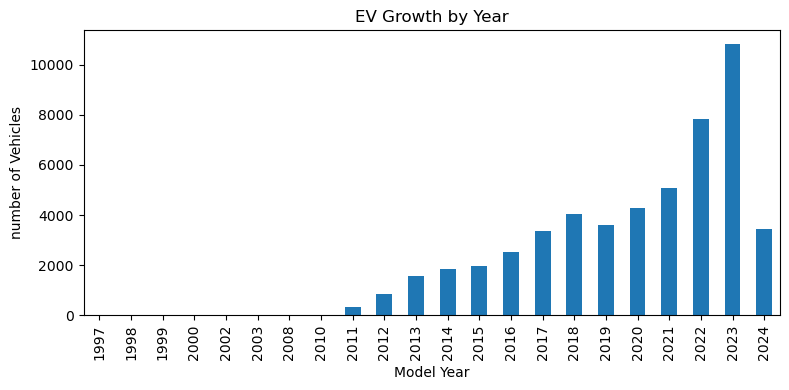

In [75]:

plt.figure(figsize=(8,4))
ev.groupby('Model Year')['Make'].count().plot(kind='bar')
plt.title('EV Growth by Year')
plt.xlabel('Model Year')
plt.ylabel('number of Vehicles')


plt.tight_layout()
plt.show()

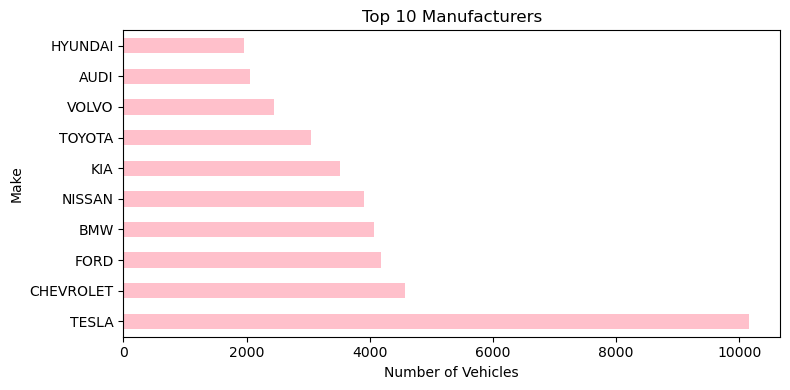

In [76]:

plt.figure(figsize=(8,4))
ev['Make'].value_counts().head(10).plot(kind='barh',color= 'pink')
plt.title('Top 10 Manufacturers')
plt.xlabel('Number of Vehicles')

plt.tight_layout()
plt.show()

In [77]:
top_makes=ev['Make'].value_counts().head(5).index
ev_top =ev[ev['Make'].isin(top_makes)]

In [78]:
ev_yearly=ev_top.groupby(['Model Year','Make']).size().reset_index(name='count')

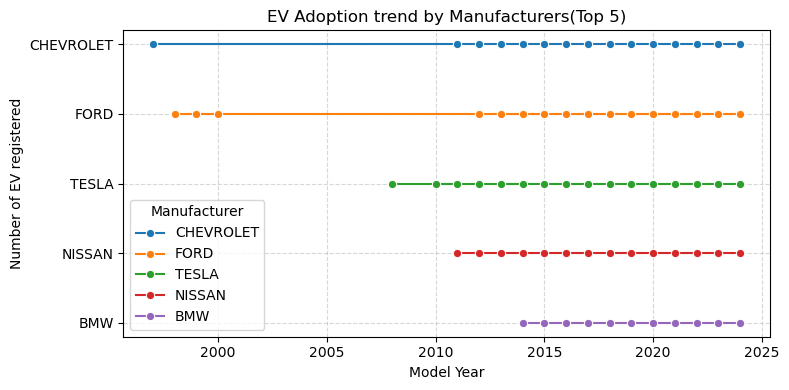

In [79]:

plt.figure(figsize=(8,4))
sns.lineplot(data=ev_yearly,x='Model Year',y='Make',hue='Make',marker='o')
plt.title('EV Adoption trend by Manufacturers(Top 5)')
plt.xlabel('Model Year')
plt.ylabel('Number of EV registered')
plt.legend(title='Manufacturer')
plt.grid(True,linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()

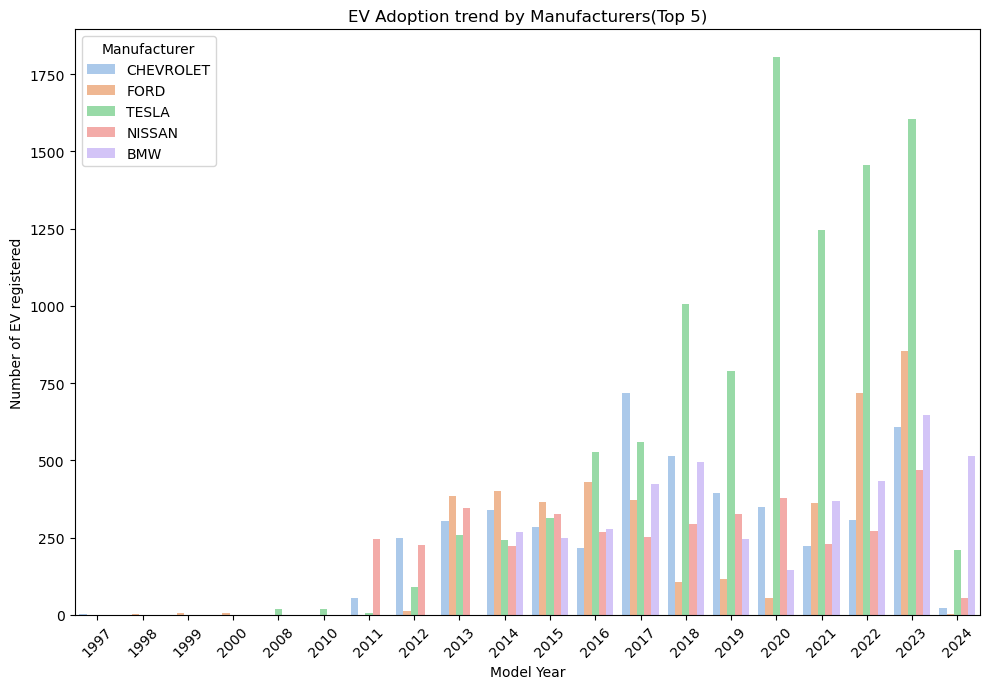

In [80]:

plt.figure(figsize=(10,7))
sns.barplot(data=ev_yearly,x='Model Year',y='count',hue='Make',palette='pastel')
plt.title('EV Adoption trend by Manufacturers(Top 5)')
plt.xlabel('Model Year')
plt.xticks(rotation=45)
plt.ylabel('Number of EV registered')
plt.legend(title='Manufacturer')
#plt.grid(True,linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()

In [81]:
station.shape

(65134, 72)

In [82]:
station.columns

Index(['Station Name', 'Street Address', 'City', 'State', 'ZIP', 'Plus4',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'ID', 'Updated At', 'Owner Type Code',
       'Federal Agency ID', 'Federal Agency Name', 'Open Date',
       'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'EV Connector Types', 'Country',
       'Intersection Directions (French)', 'Access Days Time (French)',
       'BD Blends (French)', 'Groups With Access Code (French)',
       'Hydrogen Is Retail', 'Access Code', 'Access Detail Code',
       'Federal Agency Code', 'Facility Type', 'CNG Dispenser Num',
       'CNG On-Site Renewable Source', 'CNG Tot

In [83]:
evstation=station[station['EV Network'].notna()].copy()

In [84]:
evstation.shape

(65132, 72)

In [85]:
evstation=evstation[['Station Name', 'Street Address', 'City', 'State', 'ZIP','Access Code', 'Access Days Time','EV Network','EV Connector Types',
                      'Latitude', 'Longitude']]

In [86]:
evstation.columns=evstation.columns.str.strip().str.lower().str.replace(' ','_') 
evstation.columns

Index(['station_name', 'street_address', 'city', 'state', 'zip', 'access_code',
       'access_days_time', 'ev_network', 'ev_connector_types', 'latitude',
       'longitude'],
      dtype='object')

In [87]:
evstation.head(2)

,station_name,street_address,city,state,zip,access_code,access_days_time,ev_network,ev_connector_types,latitude,longitude
0,LADWP - Truesdale Center,11797 Truesdale St,Sun Valley,CA,91352,private,Fleet use only,SHELL_RECHARGE,CHADEMO J1772 J1772COMBO,34.248319,-118.387971
1,Los Angeles Convention Center,1201 S Figueroa St,Los Angeles,CA,90015,public,5:30am-9pm; pay lot,Non-Networked,J1772,34.040539,-118.271387


In [88]:
evstation.dtypes

station_name           object
street_address         object
city                   object
state                  object
zip                    object
access_code            object
access_days_time       object
ev_network             object
ev_connector_types     object
latitude              float64
longitude             float64
dtype: object

In [89]:
evstation.isnull().sum()

station_name             1
street_address          34
city                     5
state                   14
zip                      1
access_code              0
access_days_time      7008
ev_network               0
ev_connector_types      34
latitude                 0
longitude                0
dtype: int64

In [90]:
evstation['station_name']=evstation['station_name'].fillna('Unknown')
evstation['street_address']=evstation['street_address'].fillna('Not Specified')
evstation['city']=evstation['city'].fillna('Unknown')
evstation['state']=evstation['state'].fillna('Unknown')
evstation['zip']=evstation['zip'].fillna('000000')
evstation['access_days_time']=evstation['access_days_time'].fillna('Not Available')
evstation['ev_connector_types']=evstation['ev_connector_types'].fillna('Unknown')


In [91]:
evstation.isnull().sum()

station_name          0
street_address        0
city                  0
state                 0
zip                   0
access_code           0
access_days_time      0
ev_network            0
ev_connector_types    0
latitude              0
longitude             0
dtype: int64

In [92]:
evstation['access_category']=evstation['access_code'].apply(lambda x:'public' if 'public' in str(x) else 'private')

In [93]:
evstation['connector_count']=evstation['ev_connector_types'].apply(lambda x:len(str(x).split(',')) if pd.notnull(x) else 0)

In [94]:
evstation=evstation[evstation['state'] !='unknown']

In [95]:
evstation.head(2)

,station_name,street_address,city,state,zip,access_code,access_days_time,ev_network,ev_connector_types,latitude,longitude,access_category,connector_count
0,LADWP - Truesdale Center,11797 Truesdale St,Sun Valley,CA,91352,private,Fleet use only,SHELL_RECHARGE,CHADEMO J1772 J1772COMBO,34.248319,-118.387971,private,1
1,Los Angeles Convention Center,1201 S Figueroa St,Los Angeles,CA,90015,public,5:30am-9pm; pay lot,Non-Networked,J1772,34.040539,-118.271387,public,1


In [96]:
evstation.ev_network.unique()

array(['SHELL_RECHARGE', 'Non-Networked', 'Volta', 'EV Connect',
       'POWERFLEX', 'ChargePoint Network', 'OpConnect', 'EVGATEWAY',
       'CHARGELAB', 'eVgo Network', 'AMPUP', 'EVCS', 'UNIVERSAL',
       'Blink Network', 'Tesla', 'ZEFNET', 'Tesla Destination',
       'Electrify America', 'FCN', 'LIVINGSTON', 'FLO', 'FPLEV',
       'BP_PULSE', '7CHARGE', 'RIVIAN_WAYPOINTS', 'EVMATCH', 'RED_E',
       'SWTCH', 'CIRCLE_K', 'AMPED_UP', 'WAVE', 'EVRANGE',
       'GRAVITI_ENERGY', 'FLASH', 'RIVIAN_ADVENTURE', 'CHARGEUP', 'JULE',
       'NOODOE', 'CHARGIE', 'TURNONGREEN', 'LOOP', 'REVEL', 'POWER_NODE',
       'STAY_N_CHARGE', 'ENVIROSPARK'], dtype=object)

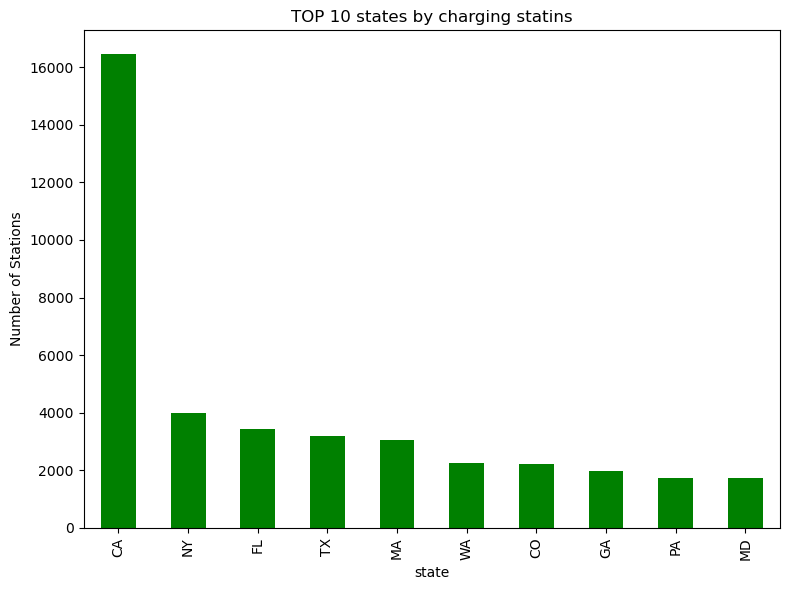

In [97]:
#top 10 states by charging stations
evstation['state'].value_counts().head(10).plot(kind='bar',figsize=(8,6),color='green')
plt.title('TOP 10 states by charging statins')
plt.xlabel('state')
plt.ylabel('Number of Stations')
plt.tight_layout()
plt.show()
                                       

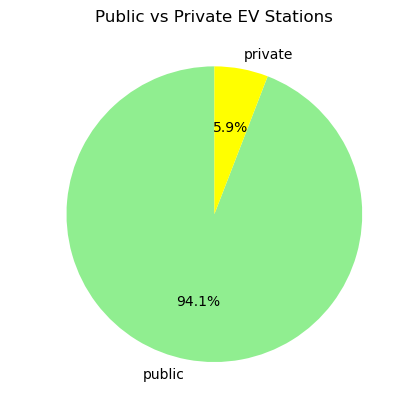

In [98]:
#public vs private access 
evstation['access_category'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=90,colors=['lightgreen','yellow'])
plt.title('Public vs Private EV Stations')
plt.ylabel(' ')
plt.show()

In [99]:
evstation.to_csv('C:/Users/Nyla Majid/OneDrive/Documents/Datasets/evstation_cleaned.csv',index=False)

In [100]:
ev.to_csv('C:/Users/Nyla Majid/OneDrive/Documents/Datasets/ev_cleaned.csv',index=False)

In [101]:
print(ev.columns)
print(evstation.columns)

Index(['County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model',
       'Range_Miles', 'CAFV_Eligibility', 'Electric Range', 'Electric Utility',
       'Vehicle_Age', 'Range Category'],
      dtype='object')
Index(['station_name', 'street_address', 'city', 'state', 'zip', 'access_code',
       'access_days_time', 'ev_network', 'ev_connector_types', 'latitude',
       'longitude', 'access_category', 'connector_count'],
      dtype='object')


In [108]:
merged = pd.merge(ev,evstation, how='left',left_on=['city','state'],right_on=['city','state'])

In [ ]:
merged.shape

In [109]:
#EV count per State
ev_state=ev.groupby('state').size().reset_index(name='EV_Count')
#print(ev_state)

In [110]:

#Station per state
station_state=evstation['state'].value_counts().reset_index(name='Station_Count')

In [111]:
#MERGING THE ABOVE TWO
data=pd.merge(ev_state,station_state,left_on='state',right_on='state',how='inner')
data['EVs_per_station']= (data['EV_Count'] / data['Station_Count']).round(2)
data.sort_values(by='EVs_per_station',ascending=False).head(10)

,state,EV_Count,Station_Count,EVs_per_station
41,WA,51186,2246,22.79
40,VA,46,1571,0.03
11,HI,9,375,0.02
20,MD,31,1734,0.02
42,WY,2,103,0.02
5,CO,12,2204,0.01
4,CA,100,16455,0.01
3,AZ,10,1224,0.01
0,AK,1,67,0.01
1,AL,6,431,0.01


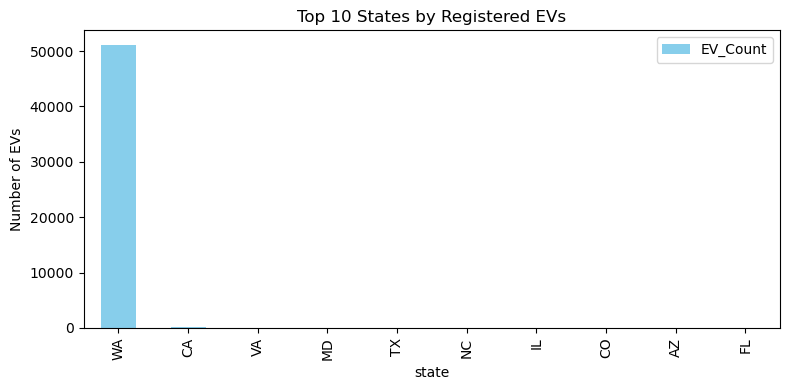

In [112]:
data.sort_values(by='EV_Count', ascending=False).head(10).plot(
    x='state', y='EV_Count', kind='bar', figsize=(8,4), color='skyblue')
plt.title('Top 10 States by Registered EVs')
plt.ylabel('Number of EVs')
plt.tight_layout()
plt.show()

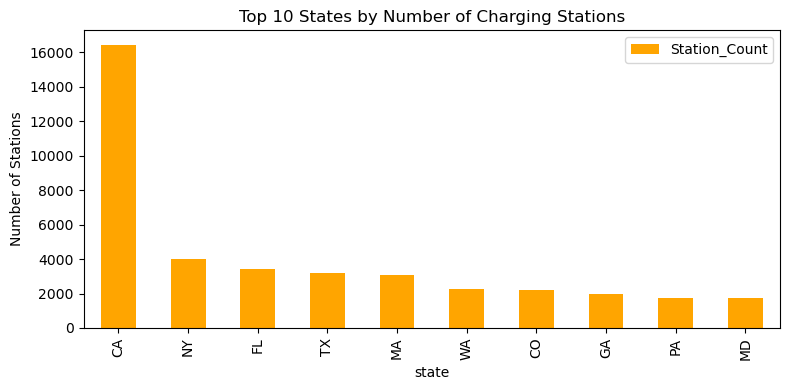

In [113]:
data.sort_values(by='Station_Count', ascending=False).head(10).plot(
    x='state', y='Station_Count', kind='bar', figsize=(8,4), color='orange')
plt.title('Top 10 States by Number of Charging Stations')
plt.ylabel('Number of Stations')
plt.tight_layout()
plt.show()


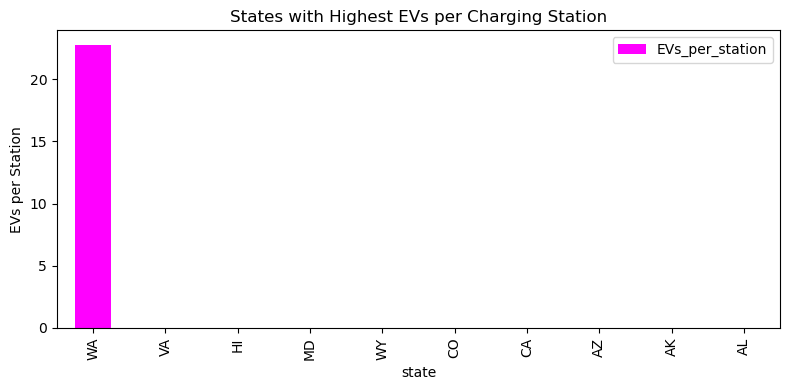

In [114]:
data.sort_values(by='EVs_per_station', ascending=False).head(10).plot(
    x='state', y='EVs_per_station', kind='bar', figsize=(8,4), color='magenta')
plt.title('States with Highest EVs per Charging Station')
plt.ylabel('EVs per Station')
plt.tight_layout()
plt.show()


In [115]:
data.to_csv('C:/Users/Nyla Majid/OneDrive/Documents/Datasets/ev_infrastructure_analysis.csv', index=False)

In [116]:
#corelation
corr = data[['EV_Count', 'Station_Count']].corr()
print("Correlation Matrix:")
print(corr)


Correlation Matrix:
               EV_Count  Station_Count
EV_Count       1.000000       0.050066
Station_Count  0.050066       1.000000


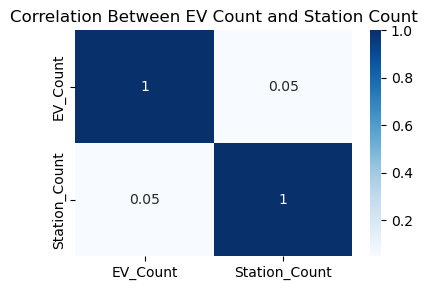

In [117]:
plt.figure(figsize=(4,3))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Between EV Count and Station Count')
plt.tight_layout()
plt.show()

In [118]:
#Regression Analysis
from sklearn.linear_model import LinearRegression

In [119]:
# Prepare data
x = data[['EV_Count']]  # independent variable
y = data['Station_Count']  # dependent variable
# Fit linear regression
model = LinearRegression()
model.fit(x, y)
# Get slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

print(f"Regression equation: Station_Count = {intercept:.2f} + {slope:.4f} * EV_Count")



Regression equation: Station_Count = 1444.76 + 0.0162 * EV_Count


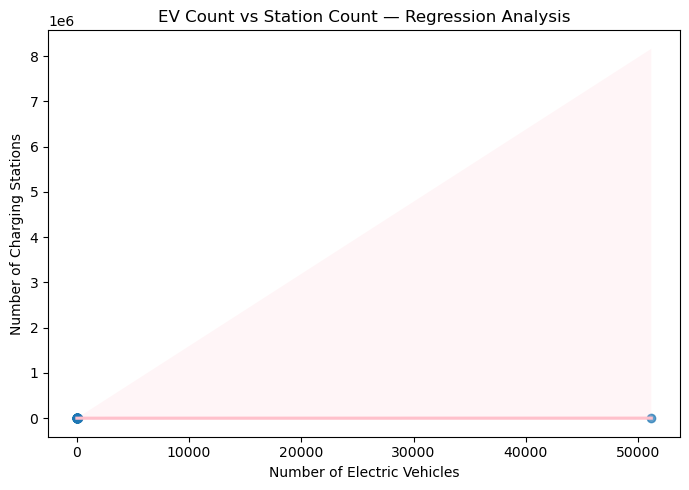

In [120]:
plt.figure(figsize=(7,5))
sns.regplot(x='EV_Count', y='Station_Count', data=data, scatter_kws={'alpha':0.7}, line_kws={'color':'pink'})
plt.title('EV Count vs Station Count — Regression Analysis')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('Number of Charging Stations')
plt.tight_layout()
plt.show()
